## Observations and Insights 

In [1]:
# Some observations from the data analysis below:
# 1. The gender ratios of female mice and male mice are almost equal. Thus, the gender is not a factor that affects the 
#    research result.
# 2. The heavier the mouse is, the bigger the average tumor volume for that mouse. The mouse weight and average tumor volume
#    are positive correlated.
# 3. There is only one data ,which is under Infubinol treatment,to be considered as outlier data. In other words, 
#    the correlation that we found in this dataset is convincing.
# 4. We randomly selected a mouse under Capomulin treatment for example. The result shows that as more treatment were conducted 
#    in different timepoints, the tumor volume got smaller, which means the treatment is effective in this case.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_result = mouse_metadata.merge(study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_result

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_all_record_df = pd.DataFrame(combined_result.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")) 
mice_all_record_df.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice without duplicates
mice_count = mice_all_record_df["Mouse ID"].count()
print(f"The total number of mice records is: {mice_count}")

The total number of mice records is: 1888


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows = combined_result[combined_result.duplicated(["Mouse ID", "Timepoint"])]
duplicated_rows_df = pd.DataFrame(duplicated_rows)
duplicated_rows_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

In [7]:
# showing all the duplicated records with same Mouse ID (record of first Mouse ID is omitted in this table)
duplicated_rows_all = mice_all_record_df[mice_all_record_df.duplicated(["Mouse ID"])]
duplicated_rows_all.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,5,38.825898,0
1,k403,Ramicane,Male,21,16,10,35.014271,1
2,k403,Ramicane,Male,21,16,15,34.223992,1
3,k403,Ramicane,Male,21,16,20,32.997729,1
4,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1634,z969,Naftisol,Male,9,30,25,63.145652,2
1635,z969,Naftisol,Male,9,30,30,65.841013,3
1636,z969,Naftisol,Male,9,30,35,69.176246,4
1637,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# showing all the records without duplicated records
mice_count_df = pd.DataFrame(combined_result.drop_duplicates(subset="Mouse ID", keep="first")) 
mice_count_df.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0
245,z435,Propriva,Female,12,26,0,45.0,0
246,z581,Infubinol,Female,24,25,0,45.0,0
247,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
count_mice = mice_count_df["Mouse ID"].count()
print(f"Total number of mice: {count_mice}")

Total number of mice: 249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [11]:
# - mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
vol_mean = mice_all_record_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
vol_median = mice_all_record_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
vol_variance = mice_all_record_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
vol_st_dev = mice_all_record_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
vol_sem= mice_all_record_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [12]:
# Assemble the resulting series into a single summary dataframe.
regimen_summary_df = pd.DataFrame({"Tumor Vol. Mean":vol_mean.map("{:.2f}".format), 
                                  "Tumor Vol. Median":vol_median.map("{:.2f}".format),
                                  "Tumor Vol. Variance":vol_variance.map("{:.2f}".format),
                                  "Tumor Vol. St.Dev":vol_st_dev.map("{:.2f}".format),
                                  "Tumor Vol. SEM":vol_sem.map("{:.2f}".format)})
regimen_summary_df

,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. St.Dev,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# define a variable "aggregation" to calculate mean, median, variance, standard deviation, and SEM of the tumor volume.
aggregation = {"Tumor Volume (mm3)":["mean","median","var","std","sem"]}

# Using the aggregation method, produce the same summary statistics
regimen_summary_agg = mice_all_record_df.groupby("Drug Regimen").agg(aggregation)

#change the titles, and format:
regimen_summary_agg.columns = regimen_summary_agg.columns.droplevel(level=0)
regimen_summary_agg.columns = ["Tumor Vol. Mean","Tumor Vol. Median","Tumor Vol. Variance","Tumor Vol. St.Dev","Tumor Vol. SEM"]
regimen_summary_agg.style.format("{:.2f}")


,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. St.Dev,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

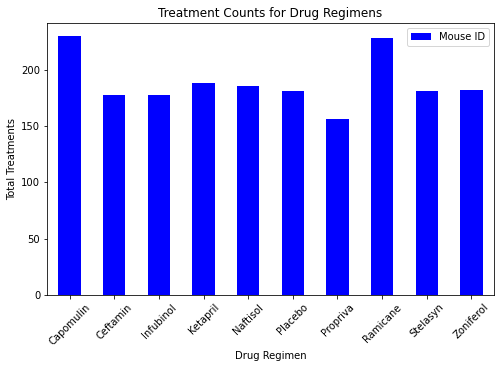

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count_df = pd.DataFrame(mice_all_record_df.groupby("Drug Regimen").count())
regimen_name = mice_all_record_df["Drug Regimen"].unique().tolist()
regimen_count_summary = regimen_count_df[["Mouse ID"]]
regimen_count_summary.plot(kind="bar", figsize=(8,5), color = "blue")

# put title and labels on the bar chart
plt.title("Treatment Counts for Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Treatments")
plt.xticks(rotation = 45)
plt.show()
plt.tight_layout()

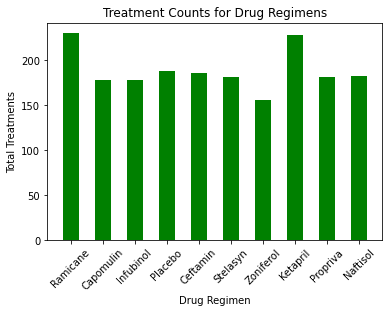

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_count_series = regimen_count_df["Mouse ID"]
plt.bar(regimen_name, regimen_count_series, width = 0.5, color = "green")

plt.title("Treatment Counts for Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Treatments")
plt.xticks(rotation = 45)
plt.show()
plt.tight_layout()

Text(0, 0.5, '')

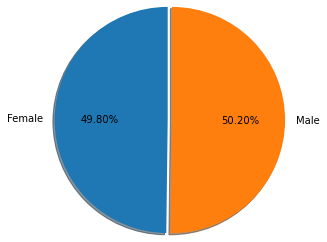

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count_df = pd.DataFrame(mice_count_df.groupby("Sex").count())
gender_count_df.plot(kind = "pie", y = "Mouse ID", explode = (0.05, 0), shadow = True, autopct='%1.2f%%', 
                     radius=1.3, legend = False, startangle = 90)
plt.xlabel("")
plt.ylabel("")

([<matplotlib.patches.Wedge at 0x1ed4c3bdc40>,
 [Text(-1.4799705512766088, 0.009336345859648614, 'Female'),
  Text(1.4299715461659126, -0.009020928769795794, 'Male')],
 [Text(-0.8299834848375576, 0.005235923691559695, '49.80%'),
  Text(0.7799844797268614, -0.004920506601706797, '50.20%')])

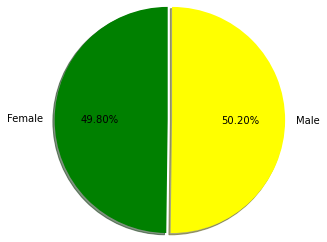

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count_list = (mice_count_df.groupby("Sex")["Mouse ID"].count()).tolist()
legend_gender = ["Female", "Male"]
colors = ["green", "yellow"]
plt.pie(gender_count_list, explode = (0.05, 0), shadow = True, autopct='%1.2f%%', 
                     radius=1.3, startangle = 90, labels = legend_gender, colors = colors)

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Capomulin:
# Start by getting the last (greatest) timepoint for each mouse

# Only Capomulin is being shown:
capo_all = mice_all_record_df[mice_all_record_df["Drug Regimen"].isin(["Capomulin"])]

capo_group = capo_all.groupby(["Drug Regimen", "Mouse ID"])
capo_last_tp = capo_group[["Timepoint"]].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capo_last_vol = capo_last_tp.merge(mice_all_record_df, how = "left", on = ["Mouse ID", "Timepoint", "Drug Regimen"])

format_dict = {"Tumor Volume (mm3)":"{:.2f}"}
capo_last_vol.style.format(format_dict).hide_index()

Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
b128,45,Capomulin,Female,9,22,38.98,2
b742,45,Capomulin,Male,7,21,38.94,0
f966,20,Capomulin,Male,16,17,30.49,0
g288,45,Capomulin,Male,3,19,37.07,1
g316,45,Capomulin,Female,22,22,40.16,2
i557,45,Capomulin,Female,1,24,47.69,1
i738,45,Capomulin,Female,23,20,37.31,2
j119,45,Capomulin,Female,7,23,38.13,1
j246,35,Capomulin,Female,21,21,38.75,1
l509,45,Capomulin,Male,17,21,41.48,3


In [19]:
# Ramicane:
# Start by getting the last (greatest) timepoint for each mouse

# Only Ramicane is being shown:
rami_all = mice_all_record_df[mice_all_record_df["Drug Regimen"].isin(["Ramicane"])]

rami_group = rami_all.groupby(["Drug Regimen", "Mouse ID"])
rami_last_tp = rami_group[["Timepoint"]].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
rami_last_vol = rami_last_tp.merge(mice_all_record_df, how = "left", on = ["Mouse ID", "Timepoint", "Drug Regimen"])

format_dict = {"Tumor Volume (mm3)":"{:.2f}"}
rami_last_vol.style.format(format_dict).hide_index()

Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
a411,45,Ramicane,Male,3,22,38.41,1
a444,45,Ramicane,Female,10,25,43.05,0
a520,45,Ramicane,Male,13,21,38.81,1
a644,45,Ramicane,Female,7,17,32.98,1
c458,30,Ramicane,Female,23,20,38.34,2
c758,45,Ramicane,Male,9,17,33.40,1
d251,45,Ramicane,Female,8,19,37.31,2
e662,45,Ramicane,Male,8,24,40.66,2
g791,45,Ramicane,Male,11,16,29.13,1
i177,45,Ramicane,Male,10,18,33.56,3


In [20]:
# Infubinol:
# Start by getting the last (greatest) timepoint for each mouse

# Only Infubinol is being shown:
infu_all = mice_all_record_df[mice_all_record_df["Drug Regimen"].isin(["Infubinol"])]

infu_group = infu_all.groupby(["Drug Regimen", "Mouse ID"])
infu_last_tp = infu_group[["Timepoint"]].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infu_last_vol = infu_last_tp.merge(mice_all_record_df, how = "left", on = ["Mouse ID", "Timepoint", "Drug Regimen"])

format_dict = {"Tumor Volume (mm3)":"{:.2f}"}
infu_last_vol.style.format(format_dict).hide_index()

Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
a203,45,Infubinol,Female,20,23,67.97,2
a251,45,Infubinol,Female,21,25,65.53,1
a577,30,Infubinol,Female,6,25,57.03,2
a685,45,Infubinol,Male,8,30,66.08,3
c139,45,Infubinol,Male,11,28,72.23,2
c326,5,Infubinol,Female,18,25,36.32,0
c895,30,Infubinol,Female,7,29,60.97,2
e476,45,Infubinol,Male,23,26,62.44,1
f345,45,Infubinol,Male,23,26,60.92,1
i386,40,Infubinol,Female,23,29,67.29,4


In [21]:
# Ceftamin:
# Start by getting the last (greatest) timepoint for each mouse

# Only Ceftamin is being shown:
ceft_all = mice_all_record_df[mice_all_record_df["Drug Regimen"].isin(["Ceftamin"])]

ceft_group = ceft_all.groupby(["Drug Regimen", "Mouse ID"])
ceft_last_tp = ceft_group[["Timepoint"]].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceft_last_vol = ceft_last_tp.merge(mice_all_record_df, how = "left", on = ["Mouse ID", "Timepoint", "Drug Regimen"])

format_dict = {"Tumor Volume (mm3)":"{:.2f}"}
ceft_last_vol.style.format(format_dict).hide_index()

Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
a275,45,Ceftamin,Female,20,28,63.00,3
b447,0,Ceftamin,Male,2,30,45.00,0
b487,25,Ceftamin,Female,6,28,56.06,1
b759,30,Ceftamin,Female,12,25,55.74,1
f436,15,Ceftamin,Female,3,25,48.72,2
h531,5,Ceftamin,Male,5,27,47.78,0
j296,45,Ceftamin,Female,24,30,61.85,3
k210,45,Ceftamin,Male,15,28,68.92,3
l471,45,Ceftamin,Female,7,28,67.75,1
l490,30,Ceftamin,Male,24,26,57.92,3


In [22]:
# Put treatments into a list (and later for plot labels)
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create list to fill with tumor vol data (for plotting)

tumor_vol_capo = list(capo_last_vol["Tumor Volume (mm3)"])
tumor_vol_rami = list(rami_last_vol["Tumor Volume (mm3)"])
tumor_vol_infu = list(infu_last_vol["Tumor Volume (mm3)"])
tumor_vol_ceft = list(ceft_last_vol["Tumor Volume (mm3)"])

In [23]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_quartiles = capo_last_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq - capo_lowerq

capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)
print(f"Tumor Volume (mm3) below {capo_lower_bound:.2f} or above {capo_upper_bound:.2f} could be outliers for Capomulin Treatment.")

rami_quartiles = rami_last_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq - rami_lowerq

rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
print(f"Tumor Volume (mm3) below {rami_lower_bound:.2f} or above {rami_upper_bound:.2f} could be outliers for Ramicane Treatment.")

infu_quartiles = infu_last_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq - infu_lowerq

infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
print(f"Tumor Volume (mm3) below {infu_lower_bound:.2f} or above {infu_upper_bound:.2f} could be outliers for Infubinol Treatment.")

ceft_quartiles = ceft_last_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Tumor Volume (mm3) below {ceft_lower_bound:.2f} or above {ceft_upper_bound:.2f} could be outliers for Ceftamin Treatment.")
    

Tumor Volume (mm3) below 20.70 or above 51.83 could be outliers for Capomulin Treatment.
Tumor Volume (mm3) below 17.91 or above 54.31 could be outliers for Ramicane Treatment.
Tumor Volume (mm3) below 36.83 or above 82.74 could be outliers for Infubinol Treatment.
Tumor Volume (mm3) below 25.36 or above 87.67 could be outliers for Ceftamin Treatment.


In [24]:
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 
    # Determine outliers using upper and lower bounds 
#Capomulin - outliers
outlier_capo = capo_last_vol.loc[(capo_last_vol["Tumor Volume (mm3)"] < capo_lower_bound) |
                                 (capo_last_vol["Tumor Volume (mm3)"] > capo_upper_bound)]
outlier_capo

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [25]:
#Ramicane - outliers
outlier_rami = rami_last_vol.loc[(rami_last_vol["Tumor Volume (mm3)"] < rami_lower_bound) |
                                 (rami_last_vol["Tumor Volume (mm3)"] > rami_upper_bound)]
outlier_rami

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [26]:
#Infubinol - outliers
outlier_infu = infu_last_vol.loc[(infu_last_vol["Tumor Volume (mm3)"] < infu_lower_bound) |
                                 (infu_last_vol["Tumor Volume (mm3)"] > infu_upper_bound)]
outlier_infu

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
5,c326,5,Infubinol,Female,18,25,36.321346,0


In [27]:
#Ceftamin - outliers
outlier_ceft = ceft_last_vol.loc[(ceft_last_vol["Tumor Volume (mm3)"] < ceft_lower_bound) |
                                 (ceft_last_vol["Tumor Volume (mm3)"] > ceft_upper_bound)]
outlier_ceft

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


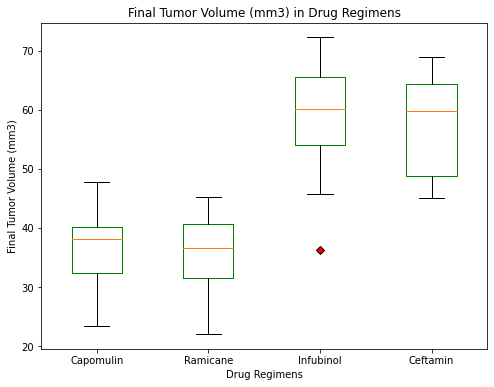

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots(figsize=(8,6))

# Generate a box plot with the data stored in the variables defined earlier, highlight the outlier data by changing their style
red_diamond = dict(markerfacecolor='red', marker='D')
bp = axs.boxplot([tumor_vol_capo, tumor_vol_rami, tumor_vol_infu, tumor_vol_ceft],flierprops=red_diamond)
axs.set_title("Final Tumor Volume (mm3) in Drug Regimens")
axs.set_xlabel("Drug Regimens")
axs.set_ylabel("Final Tumor Volume (mm3)")

#set x-axis with name of each drug regimen across four regimens of interest
axs.set_xticklabels(treatment_names)
for box in bp["boxes"]:
    box.set(color = "green")
plt.show()

## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# take one mouse (b128)'s data for plotting
capo_one_mouse = capo_all.loc[capo_all["Mouse ID"] == "s185"]
capo_one_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


(-2.0, 50.0)

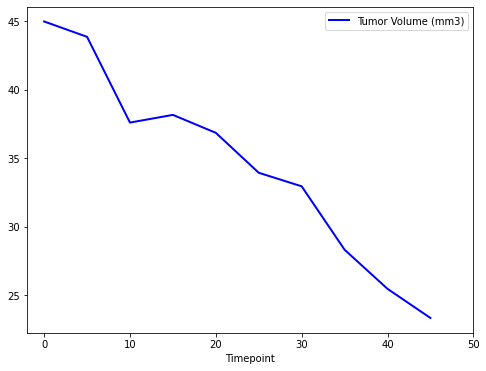

In [30]:
# get data of timepoint and tumor volume
capo_one_mouse_pl = capo_one_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

# Generate a line plot of tumor volume vs. time point for Mouse (ID:b128) that treated with Capomulin
capo_one_mouse_pl.set_index("Timepoint").plot(figsize=(8,6),linewidth=2, color="blue")
plt.xlim(-2,50)

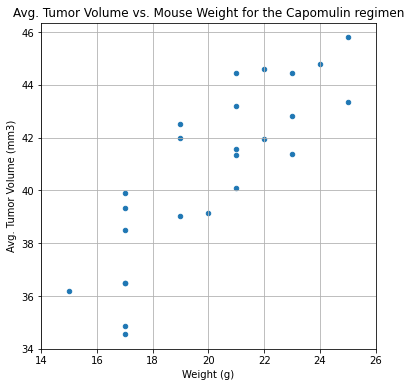

In [31]:
# calculate the average tumor volumes and create a dataframe to store the data that need to be plotted
capo_tumor_avg = pd.DataFrame({"Avg. Tumor Volume (mm3)":capo_all.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()}).reset_index()

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_tumor_avg.plot(kind="scatter", x="Weight (g)", y="Avg. Tumor Volume (mm3)", grid=True, figsize=(6,6), title="Avg. Tumor Volume vs. Mouse Weight for the Capomulin regimen")
plt.xlim(14,26)
plt.show()


## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# import linregress
from scipy.stats import linregress

In [33]:
capo_tumor_avg.head()

,Mouse ID,Weight (g),Avg. Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [34]:
# define two series: "Mouse Weight" and "Average Tumor Volume".
mouse_wt = capo_tumor_avg.loc[:,"Weight (g)"]
avg_tumor_vol = capo_tumor_avg.loc[:,"Avg. Tumor Volume (mm3)"]

In [35]:
# get the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
coefficient = st.pearsonr(mouse_wt, avg_tumor_vol)
print(f"The correlation coefficient between 'Mouse Weight' and 'Average Tumor Volume' is {coefficient[0]:.2f}")

The correlation coefficient between 'Mouse Weight' and 'Average Tumor Volume' is 0.84


The equation of the line is: y = 0.95x + 21.55


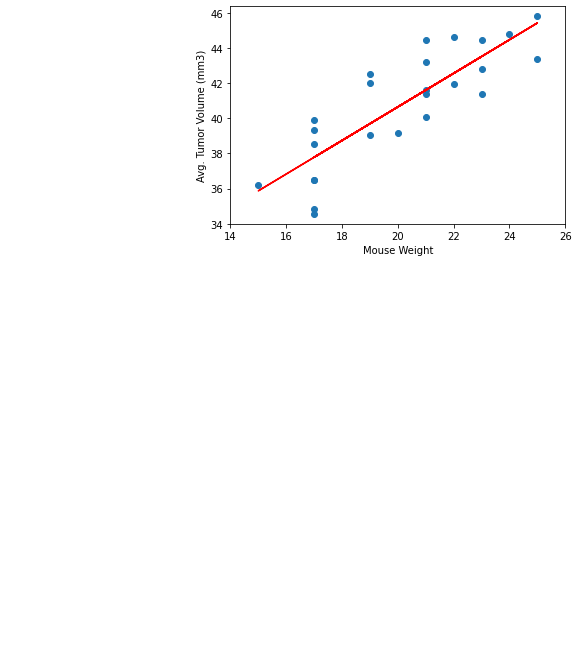

In [36]:
# plot the linear regression model
x_values = capo_tumor_avg["Weight (g)"]
y_values = capo_tumor_avg["Avg. Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.xlim(14,26)

print(f"The equation of the line is: {line_eq}")
plt.show()
